In [1]:
%matplotlib inline


# Clustering of coins images using hierarchical clustering

Compute the segmentation of a 2D image with Ward hierarchical
clustering. The clustering is spatially constrained in order
for each segmented region to be in one piece.

In [11]:
print(__doc__)

import time as time

import numpy as np
from distutils.version import LooseVersion
from scipy.ndimage.filters import gaussian_filter

import matplotlib.pyplot as plt

import skimage
from skimage.data import coins
from skimage.transform import rescale

from sklearn.feature_extraction.image import grid_to_graph
from sklearn.cluster import AgglomerativeClustering

# these were introduced in skimage-0.14 (For version compatibility)
if LooseVersion(skimage.__version__) >= '0.14':
    rescale_params = {'anti_aliasing': False, 'multichannel': False}
else:
    rescale_params = {}

Automatically created module for IPython interactive environment


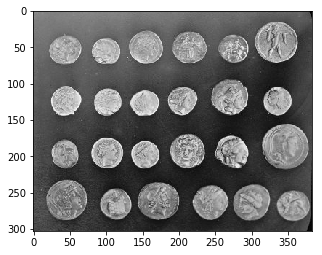

In [12]:
# #############################################################################
# Generate data
orig_coins = coins()

# Plot the coins
plt.figure(figsize=(5, 5))
plt.imshow(orig_coins, cmap=plt.cm.gray)

In [13]:
# Resize it to 20% of the original size to speed up the processing
# Applying a Gaussian filter for smoothing prior to down-scaling
# reduces aliasing artifacts.
smoothened_coins = gaussian_filter(orig_coins, sigma=2)
rescaled_coins = rescale(smoothened_coins, 0.2, mode="reflect",
                         **rescale_params)

X = np.reshape(rescaled_coins, (-1, 1))

In [14]:
# #############################################################################
# Define the structure of the data as a matrix of Pixels connected to their neighbors.
connectivity = grid_to_graph(*rescaled_coins.shape)
#print(connectivity)
connectivity

<4697x4697 sparse matrix of type '<class 'numpy.int32'>'
	with 23209 stored elements in COOrdinate format>

In [15]:
# #############################################################################
# Compute clustering
print("Compute structured hierarchical clustering...")
st = time.time()
n_clusters = 27  # number of regions

Compute structured hierarchical clustering...


4697

In [19]:
# Single Linkage
#hclust = AgglomerativeClustering(n_clusters=n_clusters, linkage='single',
#                               connectivity=connectivity)
# Average Linkage
#hclust = AgglomerativeClustering(n_clusters=n_clusters, linkage='average',
#                               connectivity=connectivity)
# Complete Linkage
#hclust = AgglomerativeClustering(n_clusters=n_clusters, linkage='complete',
#                               connectivity=connectivity)
# Ward Linkage
#  the distance between clusters is a (weighted) squared Euclidean distance between 
# the centroids of each cluster (Ward, 1963).

hclust = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward',
                              connectivity=connectivity)

In [20]:
hclust.fit(X)
len(hclust.labels_) # Get the labels

4697

In [21]:
label = np.reshape(hclust.labels_, rescaled_coins.shape) # 4697 -> convert it to 61 x 77
rescaled_coins.shape

(61, 77)

In [22]:
print("Elapsed time: ", time.time() - st)
print("Number of pixels: ", label.size)
print("Number of clusters: ", np.unique(label).size) # Each unique label belongs to one coin

Elapsed time:  139.0144464969635
Number of pixels:  4697
Number of clusters:  27


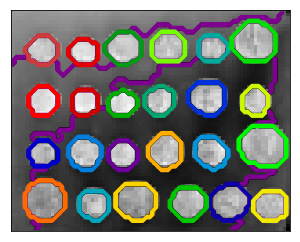

In [23]:
# #############################################################################
# Plot the results on an image
plt.figure(figsize=(5, 5))
plt.imshow(rescaled_coins, cmap=plt.cm.gray)
for l in range(n_clusters):
    plt.contour(label == l,
                colors=[plt.cm.nipy_spectral(l / float(n_clusters)), ])
plt.xticks(())
plt.yticks(())
plt.show()